In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import os
import time
IMAGES_FOLDER_PATH = "../images"

In [2]:
def ccl_2_pass(img):
    h,w = img.shape
    labels = np.int64(np.zeros(img.shape))

    assoc = {}
    clr = 1
    if img[0,0] == 1:
        labels[0,0] = 1
        assoc[1] = -1
        clr = 2
            
    for j in range(1,w):
        if img[0,j] == 1:
            if img[0,j-1] == 1:
                labels[0,j] = labels[0,j-1]
            else:
                labels[0,j] = clr
                assoc[clr] = -1
                clr = clr + 1
                
    for i in range(1,h):
        for j in range(w):
            if img[i,j] == 1:
                prev_labels = []
                
                if labels[i-1,j]>0:
                    prev_labels.append(labels[i-1,j])
                
                if j > 1 :
                    if labels[i-1,j-1]>0:
                        prev_labels.append(labels[i-1,j-1])
                    if labels[i,j-1]>0:
                        prev_labels.append(labels[i,j-1])
                if (j+1) < w:
                    if labels[i-1,j+1]>0:
                        prev_labels.append(labels[i-1,j+1])

                if len(prev_labels) > 0:
                    prev_labels = np.array(prev_labels)
                    labels[i,j] = np.min(prev_labels)
                    for x in prev_labels:
                        if x != labels[i,j]:
                            assoc[x] = labels[i,j]
                else:
                    labels[i,j] = clr
                    assoc[clr] = -1
                    clr = clr +1
    for k,v in assoc.items():
        temp = v

        while(v!=-1 and assoc[temp] != -1):
            temp = assoc[temp]
        assoc[k] = temp
    
    for i in range(h):
        for j in range(w):
            if labels[i,j] and assoc[labels[i,j]]!=-1:
                labels[i,j] = assoc[labels[i,j]]

    return labels

## Part 1

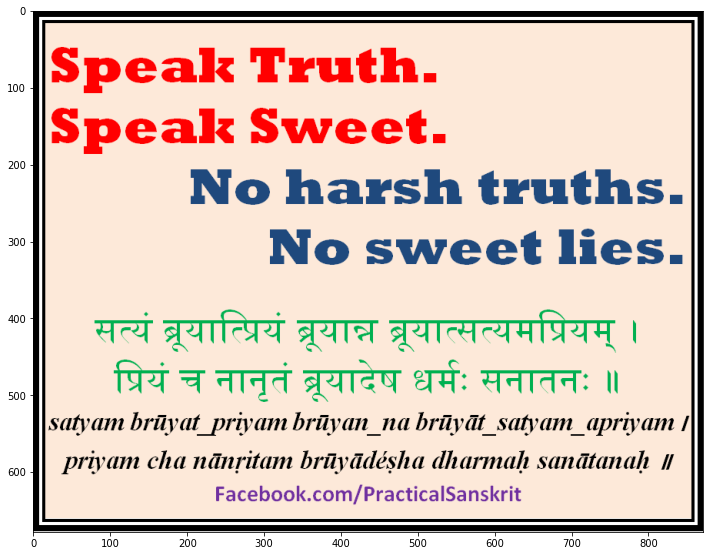

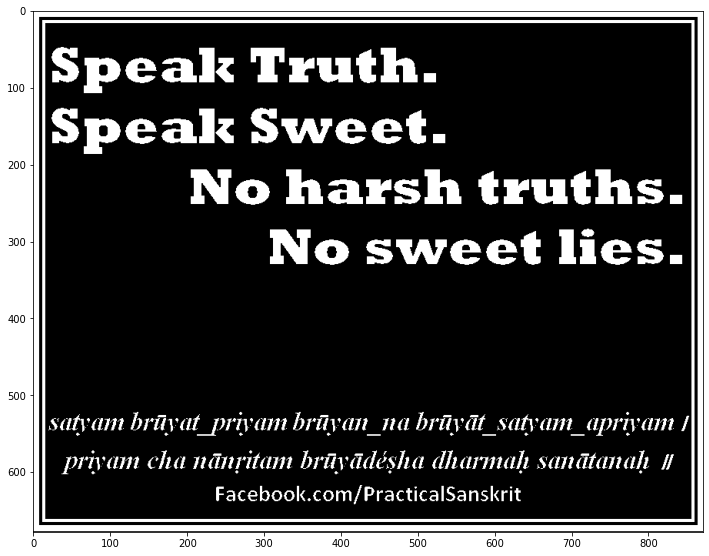

In [19]:
text = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'colourful_text.png'))
text = cv2.cvtColor(text, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,10))
plt.imshow(text)
plt.show()

text_gray = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'colourful_text.png'),0)

ret,text_gray = cv2.threshold(text_gray,100,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(12,10))
text_gray = np.int64(text_gray/255)
plt.imshow(text_gray,cmap='gray')
plt.show()


In [20]:
# px.imshow(text).show()

### Red Text

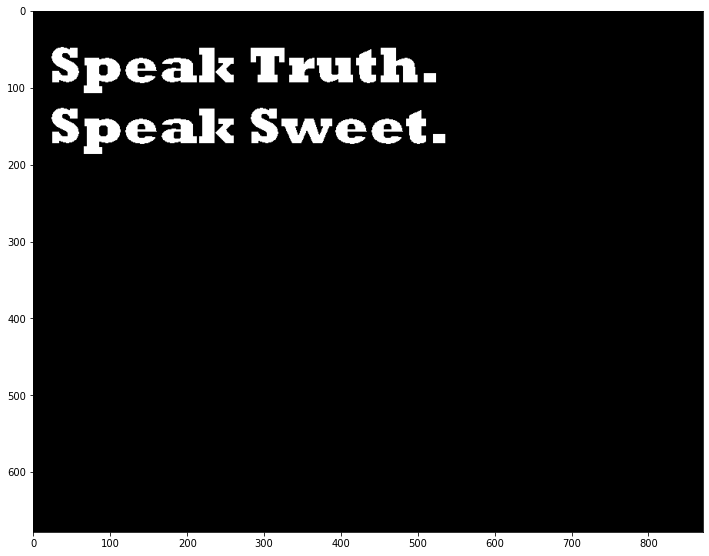

In [21]:
red_text = np.int64(np.bitwise_and(np.bitwise_and(text[:,:,0] == 255,text[:,:,1] == 0 ),text[:,:,2] == 0))
plt.figure(figsize=(12,10))
plt.imshow(red_text,cmap='gray')
plt.show()

In [22]:
labels = ccl_2_pass(red_text)

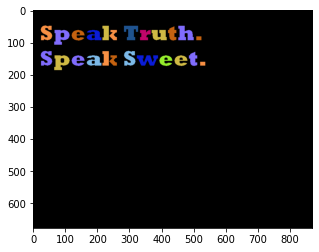

In [23]:
COLORS = [(10, 28, 215), (248, 144, 68), (192, 6, 106), 
          (148, 236, 44), (207, 185, 68), (31, 83, 143), 
          (128, 108, 253), (124,185,232), (196,98,16)
         ]

objects = red_text
output = np.zeros((objects.shape[0], objects.shape[1], 3))
for i in range(objects.shape[0]):
    for j in range(objects.shape[1]):
        if labels[i,j]:
            output[i][j] = COLORS[int(labels[i,j] % 9)]

output = np.int64(output)
plt.imshow(output,cmap='gray')
plt.show()

In [24]:
num_components = np.unique(labels).size - 1
print("Number of Components in Red Text is ",num_components)

Number of Components in Red Text is  24


## Blue Text

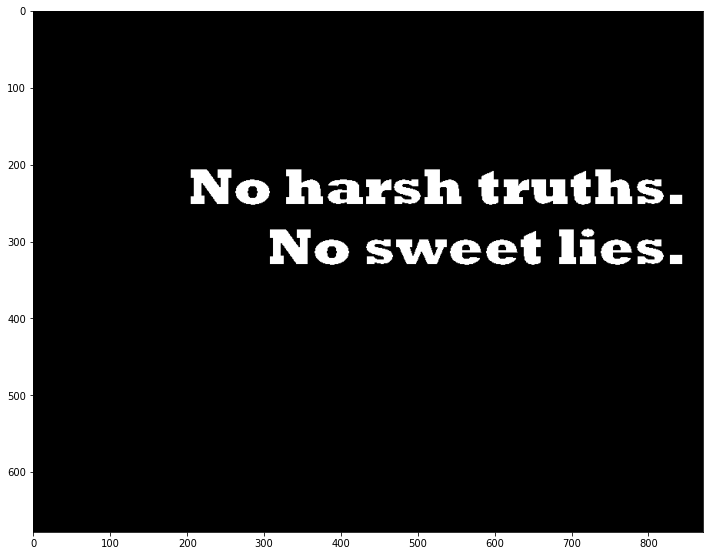

In [25]:
# 31,73, 125
blue_text =np.bitwise_and(np.bitwise_and(text[:,:,0] == 31,text[:,:,1] == 73 ),text[:,:,2] == 125 ) 
plt.figure(figsize=(12,10))
plt.imshow(blue_text,cmap='gray')
plt.show()

In [26]:
labels = ccl_2_pass(blue_text)

In [27]:
num_components = np.unique(labels).size - 1
print("Number of Components in Red Text is ",num_components)

Number of Components in Red Text is  27


## Green Text

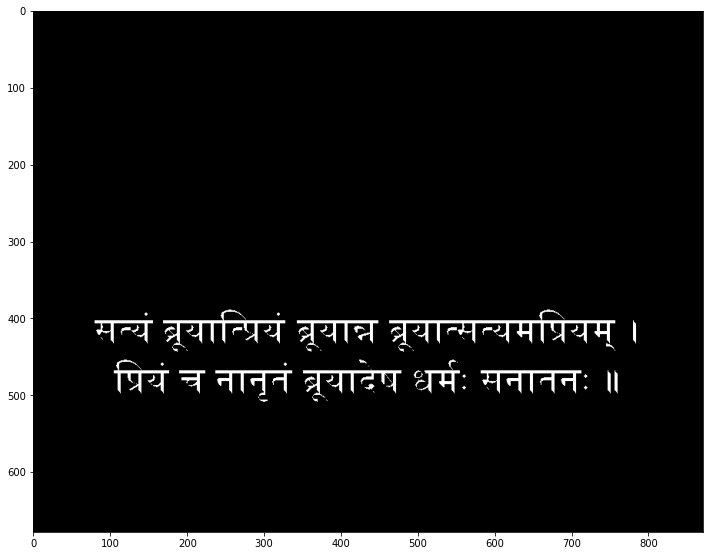

In [28]:
# 0 ,176, 80
green_text  = np.bitwise_and(np.bitwise_and(text[:,:,0] == 0,text[:,:,1] == 176 ),text[:,:,2] == 80 )
plt.figure(figsize=(12,10))
plt.imshow(green_text,cmap='gray')
plt.show()

In [29]:
labels = ccl_2_pass(green_text)

In [30]:
num_components = np.unique(labels).size - 1
print("Number of Components in Red Text is ",num_components)

Number of Components in Red Text is  74


## Pink Text

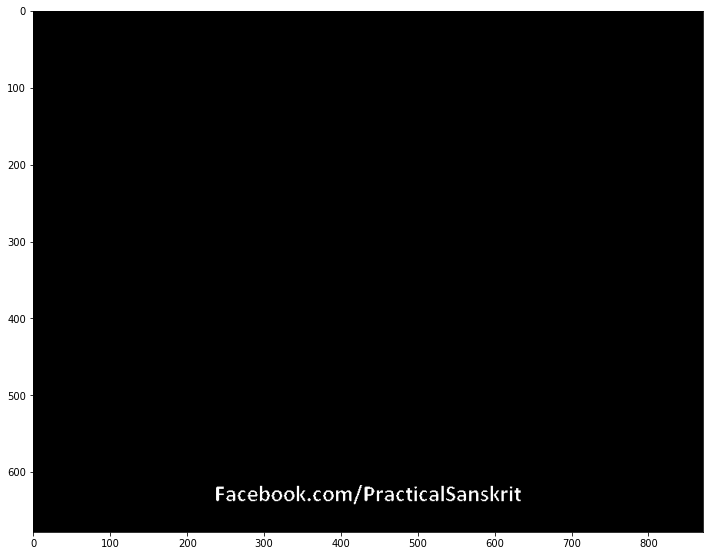

In [31]:
# 112, 48, 160
pink_text = np.bitwise_and(np.bitwise_and(text[:,:,0] == 112,text[:,:,1] == 48 ),text[:,:,2] == 160 )
plt.figure(figsize=(12,10))
plt.imshow(pink_text,cmap='gray')
plt.show()

In [32]:
labels = ccl_2_pass(pink_text)

In [33]:
num_components = np.unique(labels).size - 1
print("Number of Components in Red Text is ",num_components)

Number of Components in Red Text is  34


## Black Text

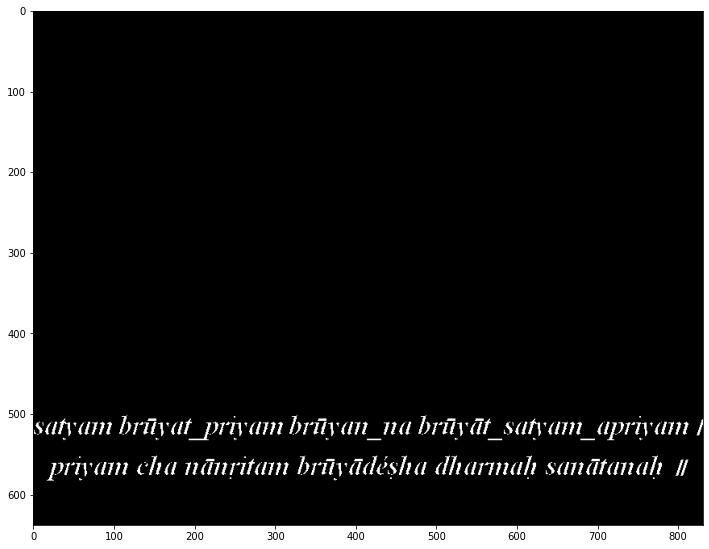

In [38]:
# 0, 0, 0
black_text = np.bitwise_and(np.bitwise_and(text[:,:,0] == 0,text[:,:,1] == 0 ),text[:,:,2] == 0 )
h,w = black_text.shape
black_text = black_text[20:h-20,20:w-20]
plt.figure(figsize=(12,10))
plt.imshow(black_text,cmap='gray')
plt.show()

In [39]:
labels = ccl_2_pass(black_text)

In [40]:
num_components = np.unique(labels).size - 1
print("Number of Components in Red Text is ",num_components)

Number of Components in Red Text is  241


## Part 2

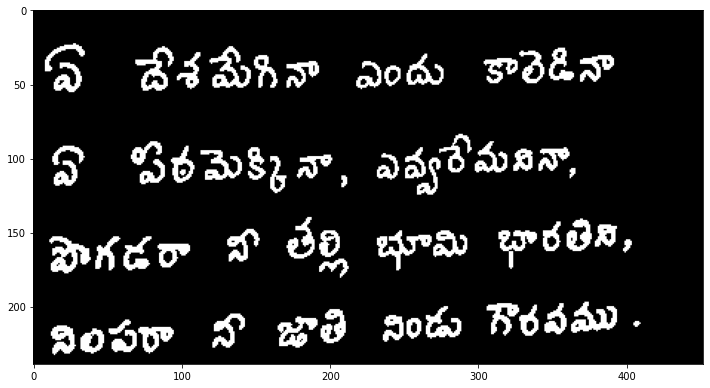

In [8]:
telugu = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'telugu.jpeg'),0)

ret,telugu = cv2.threshold(telugu,90,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(12,10))
telugu = np.int64(telugu/255)
telugu = telugu[50:telugu.shape[0]-50,50:telugu.shape[1]-100]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
telugu = cv2.dilate(np.uint8(telugu), kernel, iterations=1) 

plt.imshow(telugu,cmap='gray')
plt.show()


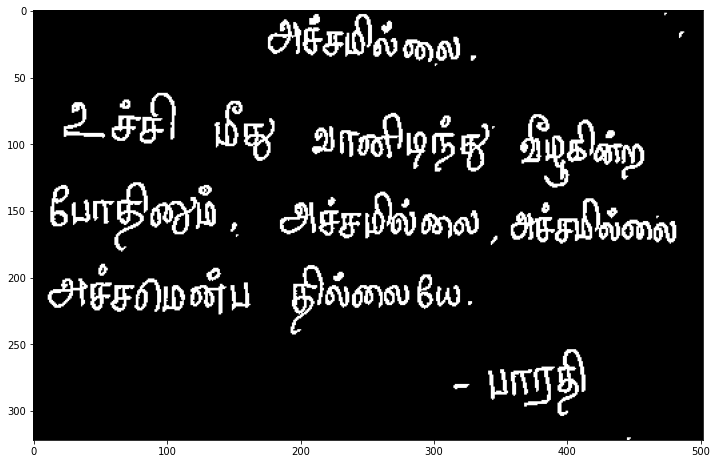

In [17]:
tamil = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'tamil.jpeg'),0)
tamil = cv2.adaptiveThreshold(tamil,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,6)
tamil = np.int64(1-(tamil/255)) 

plt.figure(figsize=(12,10))

tamil = tamil[70:tamil.shape[0]-60,70:tamil.shape[1]-30]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
tamil = cv2.dilate(np.uint8(tamil), kernel, iterations=1) 

plt.imshow(tamil,cmap='gray')
plt.show()


In [9]:
def get_object_with_holes(labels,num_holes):
    num_objects = np.unique(labels).shape[0] -1
    colors = np.unique(labels)
    output = np.zeros(labels.shape)
    count = 0
    for i in range(1,num_objects):
        color = colors[i]
        obj = np.int64(labels == color)
        
        diff_labels = ccl_2_pass(1-obj)
        
        if np.unique(diff_labels).shape[0] == (2+num_holes):
            count += 1
            output += obj
            
    return count,output

In [10]:
labels = ccl_2_pass(telugu)

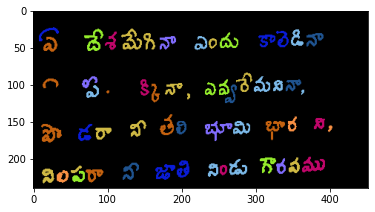

In [12]:
COLORS = [(0,0,0),(10, 28, 215), (248, 144, 68), (192, 6, 106), 
          (148, 236, 44), (207, 185, 68), (31, 83, 143), 
          (128, 108, 253), (124,185,232), (196,98,16)
         ]


output = np.zeros((labels.shape[0], labels.shape[1], 3))
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
            output[i][j] = COLORS[int(labels[i,j] % 10)]

output = np.int64(output)
plt.imshow(output,cmap='gray')
plt.show()

In [13]:
count,one_hole = get_object_with_holes(labels,1)
print("Components with with 1 hole :",count)

Components with with 1 hole : 41


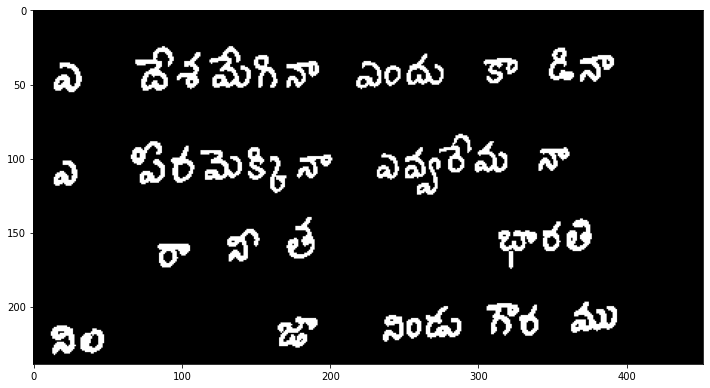

In [14]:
plt.figure(figsize=(12,10))
plt.imshow(one_hole,cmap='gray')
plt.show()

In [15]:
count,two_hole = get_object_with_holes(labels,2)
print("Components with with 2 hole :",count)

Components with with 2 hole : 8


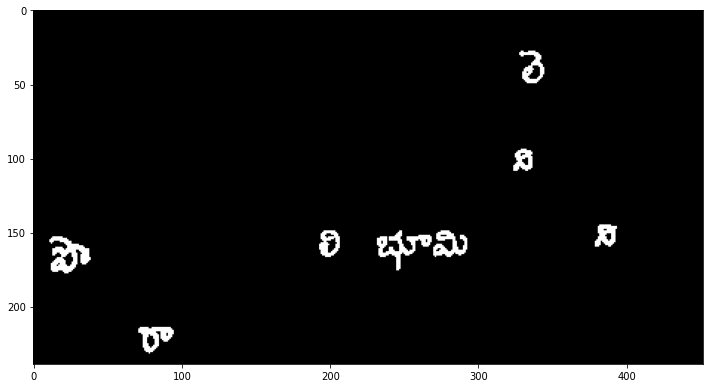

In [16]:
plt.figure(figsize=(12,10))
plt.imshow(two_hole,cmap='gray')
plt.show()

In [18]:
labels = ccl_2_pass(tamil)

In [19]:
count,one_hole = get_object_with_holes(labels,1)
print("Components with with 1 hole :",count)

Components with with 1 hole : 20


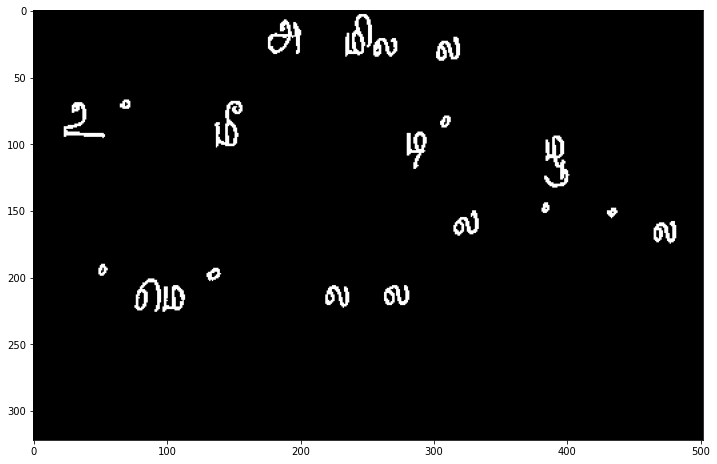

In [20]:
plt.figure(figsize=(12,10))
plt.imshow(one_hole,cmap='gray')
plt.show()

In [21]:
count,two_hole = get_object_with_holes(labels,2)
print("Components with with 2 hole :",count)

Components with with 2 hole : 19


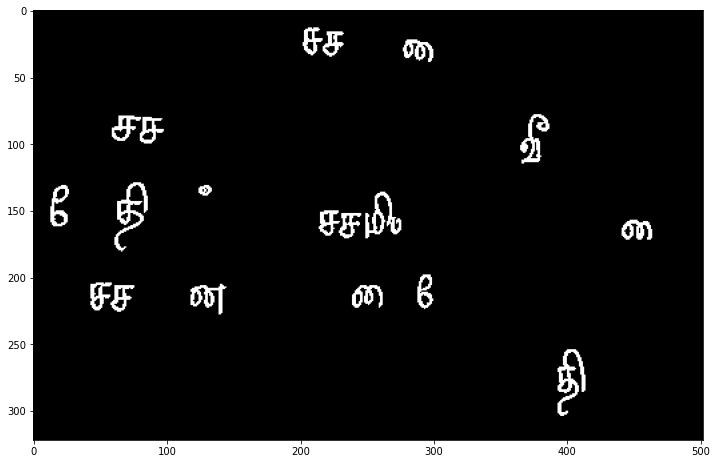

In [22]:
plt.figure(figsize=(12,10))
plt.imshow(two_hole,cmap='gray')
plt.show()